In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pylab
import matplotlib.hatch
from matplotlib.patches import Polygon

In [2]:
# Add hatches needed for bar plots



triangle = Polygon(
    [[-0.3, -0.4], [0.3, -0.4], [0., 0.1]],
    closed=True, fill=False).get_path()

# Triangle hatch to use with the identifier 't'
class TriangleHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = triangle

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('t')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)
        
        

revTriangle = Polygon(
    [[-0.3, 0.1], [0.3, 0.1], [0., -0.4]],
    closed=True, fill=False).get_path()        
        
# Triangle hatch to use with the identifier 'v'
class RevTriangleHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = revTriangle

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('v')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)
        
        
        
square = Polygon(
    [[-0.3, -0.3], [0.3, -0.3], [0.3, 0.3], [-0.3, 0.3]],
    closed=True, fill=False).get_path()

# Square hatch to use with the identifier 's'
class SquareHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = square

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('s')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)
        
        
            
diamond = Polygon(
    [[0, 0], [0.2, 0.3], [0, 0.6], [-0.2, 0.3]],
    closed=True, fill=False).get_path()

# Diamond hatch to use with the identifier 'd'
class DiamondHatch(matplotlib.hatch.Shapes):
    filled = False
    size = 1.0
    path = diamond

    def __init__(self, hatch, density):
        self.num_rows = (hatch.count('d')) * density
        self.shape_vertices = self.path.vertices
        self.shape_codes = self.path.codes
        matplotlib.hatch.Shapes.__init__(self, hatch, density)

        
              
matplotlib.hatch._hatch_types.append(TriangleHatch)
matplotlib.hatch._hatch_types.append(RevTriangleHatch)
matplotlib.hatch._hatch_types.append(SquareHatch)
matplotlib.hatch._hatch_types.append(DiamondHatch)

# Load dataframes

In [49]:
dfOrig = pd.read_csv('./original.csv')
dfRef = pd.read_csv('./refactored.csv')

In [4]:
# Global variables
SAVE_FIG = False

# Results from original systems

In [5]:
# General parameters
FOLDER_IMG = './images/'
CLASS_NAME = ['WebGoat', 'ts-security-service', 'OpenMRS', 'CloudStore', 'TeaStore']
SYSTEMS = ['webgoat', 'trainticket', 'openmrs', 'cloudstore', 'teastore']
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
STYLES = ['-o', '-^', '-v', '-s', '-d']
SIZES = [20, 20, 20, 20, 20]
LEGENDSIZE = 30
FONT_SIZE = 14

## Legend for the paper

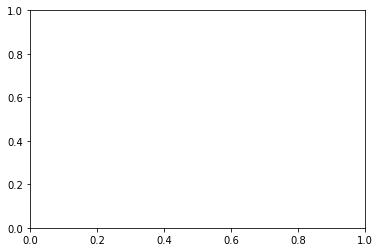

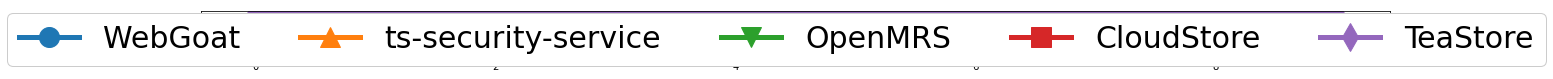

In [7]:
# The figure plotted when this cell is executed is not important.
# Please, look for the legend that is created at the specified path.

numClasses = len(SYSTEMS)
xList = range(10)

fig = pylab.figure()
figlegend = pylab.figure(figsize=(21.3,0.8))
ax = fig.add_subplot(111)
for idx in range(numClasses):
    plt.plot(xList, [idx]*len(xList), STYLES[idx], lw=5, color=COLORS[idx], label=CLASS_NAME[idx], markersize=SIZES[idx])
figlegend.legend(loc='center', ncol=numClasses, fontsize=LEGENDSIZE, facecolor='white', framealpha=1)
#fig.show()
if SAVE_FIG:
    figlegend.savefig(FOLDER_IMG + 'legend.png')

## CTH

In [8]:
AP = 'CTH'

COUNT_TH = 5
CPU_TH = 10
OPTION = 'average'

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['countTh']==COUNT_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['option']==OPTION)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 3
25-6 = 3
25-12 = 4
50-3 = 4
50-6 = 4
50-12 = 4
75-3 = 3
75-6 = 4
75-12 = 4
100-3 = 4
100-6 = 4
100-12 = 4
### trainticket ###
25-3 = 1
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 1
100-6 = 1
100-12 = 1
### openmrs ###
25-3 = 2
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 1
75-6 = 1
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### cloudstore ###
25-3 = 2
25-6 = 2
25-12 = 2
50-3 = 2
50-6 = 2
50-12 = 2
75-3 = 2
75-6 = 2
75-12 = 2
100-3 = 2
100-6 = 2
100-12 = 2
### teastore ###
25-3 = 6
25-6 = 6
25-12 = 6
50-3 = 6
50-6 = 6
50-12 = 6
75-3 = 5
75-6 = 6
75-12 = 6
100-3 = 5
100-6 = 6
100-12 = 6


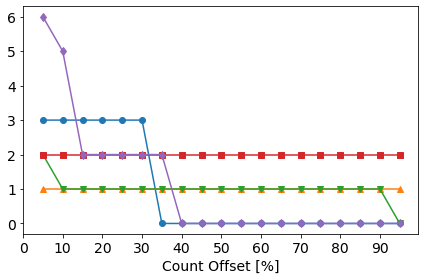

#countTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	3	1	2	2	6
10	3	1	1	2	5
15	3	1	1	2	2
20	3	1	1	2	2
25	3	1	1	2	2
30	3	1	1	2	2
35	0	1	1	2	2
40	0	1	1	2	0
45	0	1	1	2	0
50	0	1	1	2	0
55	0	1	1	2	0
60	0	1	1	2	0
65	0	1	1	2	0
70	0	1	1	2	0
75	0	1	1	2	0
80	0	1	1	2	0
85	0	1	1	2	0
90	0	1	1	2	0
95	0	1	0	2	0


In [10]:
LOAD = 25
DURATION = 3
AP = 'CTH'

# Fixed parameters
CPU_TH = 10
OPTION = 'average'

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['option'] == OPTION)
          ].sort_values(by='countTh')

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['countTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Count Offset [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Option = ' + OPTION)
# plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_opt' + str(OPTION) + '.png')
plt.show()



X_AXIS = 'countTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

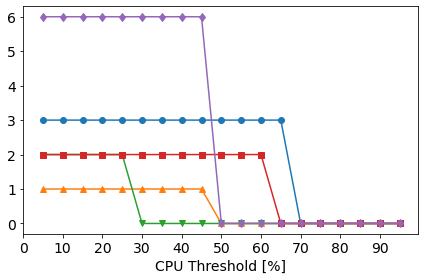

#cpuTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	3	1	2	2	6
10	3	1	2	2	6
15	3	1	2	2	6
20	3	1	2	2	6
25	3	1	2	2	6
30	3	1	0	2	6
35	3	1	0	2	6
40	3	1	0	2	6
45	3	1	0	2	6
50	3	0	0	2	0
55	3	0	0	2	0
60	3	0	0	2	0
65	3	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [11]:
LOAD = 25
DURATION = 3
AP = 'CTH'

# Fixed parameters
COUNT_TH = 5
OPTION = 'average'

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['countTh'] == COUNT_TH) &
           (dfOrig['option'] == OPTION)
          ].sort_values(by='cpuTh')

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['cpuTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('CPU Threshold [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Count) = ' + str(COUNT_TH) + ' | Option = ' + OPTION)
# plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_count' + str(COUNT_TH) + '_opt' + str(OPTION) + '.png')
plt.show()



X_AXIS = 'cpuTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

/tmp/ipykernel_643733/2738438798.py:19: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "t". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar([x+pos for x in [0,1,2]], dfTmp[dfTmp['system']==sys]['foundAP'], width=WIDTH, align='edge', color=col, hatch=shade, label=sys)
/tmp/ipykernel_643733/2738438798.py:19: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "v". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  plt.bar([x+pos for x in [0,1,2]], dfTmp[dfTmp['system']==sys]['foundAP'], width=WIDTH, align='edge', color=col, hatch=shade, label=sys)
/tmp/ipykernel_643733/2738438798.py:19: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "s". Passing invalid values is deprecated since 3.4 and 

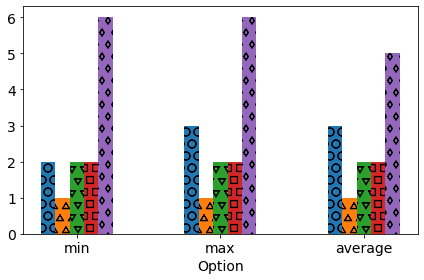

#option	webgoat	trainticket	openmrs	cloudstore	teastore
min	2	1	2	2	5
max	3	1	2	2	6
average	3	1	2	2	6


In [12]:
WIDTH = 0.1

LOAD = 25
DURATION = 3
AP = 'CTH'

# Fixed parameters
COUNT_TH = 5
CPU_TH = 10

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['countTh'] == COUNT_TH) &
           (dfOrig['cpuTh'] == CPU_TH)
          ]

for sys, stl, col, pos, shade in zip(SYSTEMS, STYLES, COLORS, [-2.5*WIDTH, -1.5*WIDTH, -0.5*WIDTH, 0.5*WIDTH, 1.5*WIDTH], ['O', 't', 'v', 's', 'd']):
    plt.bar([x+pos for x in [0,1,2]], dfTmp[dfTmp['system']==sys]['foundAP'], width=WIDTH, align='edge', color=col, hatch=shade, label=sys)
plt.xticks([0,1,2], dfTmp['option'].unique(), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Option', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Count) = ' + str(COUNT_TH) + ' | Th(CPU) = ' + str(CPU_TH))
# plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_count' + str(COUNT_TH) + '.png')
plt.show()



X_AXIS = 'option'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in ['min', 'max', 'average']:
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

## EP

In [13]:
AP = 'EP'

TIME_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 6
25-6 = 6
25-12 = 7
50-3 = 7
50-6 = 7
50-12 = 7
75-3 = 6
75-6 = 7
75-12 = 7
100-3 = 7
100-6 = 7
100-12 = 7
### trainticket ###
25-3 = 6
25-6 = 4
25-12 = 5
50-3 = 4
50-6 = 4
50-12 = 5
75-3 = 6
75-6 = 5
75-12 = 5
100-3 = 5
100-6 = 5
100-12 = 5
### openmrs ###
25-3 = 3
25-6 = 0
25-12 = 0
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 2
75-6 = 2
75-12 = 1
100-3 = 2
100-6 = 1
100-12 = 1
### cloudstore ###
25-3 = 7
25-6 = 7
25-12 = 6
50-3 = 8
50-6 = 6
50-12 = 8
75-3 = 6
75-6 = 7
75-12 = 6
100-3 = 6
100-6 = 7
100-12 = 6
### teastore ###
25-3 = 9
25-6 = 9
25-12 = 9
50-3 = 9
50-6 = 9
50-12 = 9
75-3 = 9
75-6 = 9
75-12 = 9
100-3 = 9
100-6 = 9
100-12 = 9


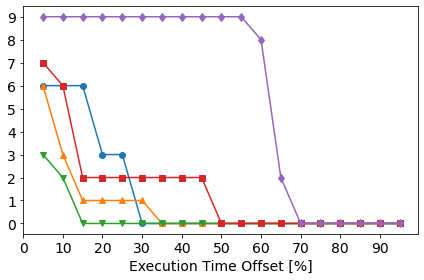

#methodTimeTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	6	6	3	7	9
10	6	3	2	6	9
15	6	1	0	2	9
20	3	1	0	2	9
25	3	1	0	2	9
30	0	1	0	2	9
35	0	0	0	2	9
40	0	0	0	2	9
45	0	0	0	2	9
50	0	0	0	0	9
55	0	0	0	0	9
60	0	0	0	0	8
65	0	0	0	0	2
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


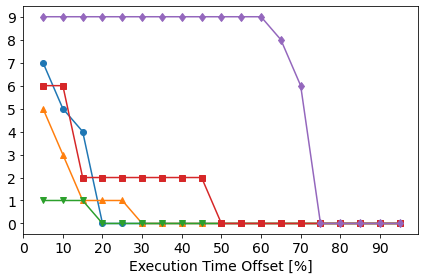

#methodTimeTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	7	5	1	6	9
10	5	3	1	6	9
15	4	1	1	2	9
20	0	1	0	2	9
25	0	1	0	2	9
30	0	0	0	2	9
35	0	0	0	2	9
40	0	0	0	2	9
45	0	0	0	2	9
50	0	0	0	0	9
55	0	0	0	0	9
60	0	0	0	0	9
65	0	0	0	0	8
70	0	0	0	0	6
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [14]:
LOADS = [25, 100]
DURATIONS = [3, 12]
AP = 'EP'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ].sort_values(by='methodTimeTh')

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['methodTimeTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Execution Time Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIG:
        plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'methodTimeTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

## WCS

In [15]:
AP = 'WCS'

MEM_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['memoryUsageTh']==MEM_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 2
50-6 = 1
50-12 = 2
75-3 = 1
75-6 = 2
75-12 = 2
100-3 = 2
100-6 = 2
100-12 = 2
### trainticket ###
25-3 = 1
25-6 = 2
25-12 = 2
50-3 = 0
50-6 = 0
50-12 = 1
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 0
100-6 = 0
100-12 = 0
### openmrs ###
25-3 = 2
25-6 = 0
25-12 = 1
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 1
75-6 = 1
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### cloudstore ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 2
75-12 = 0
100-3 = 0
100-6 = 2
100-12 = 2
### teastore ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0


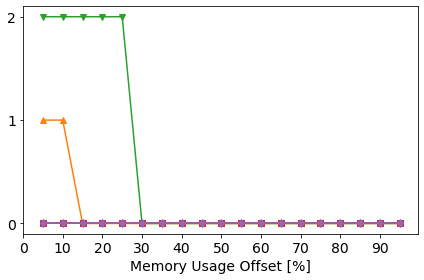

#memoryUsageTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	0	1	2	0	0
10	0	1	2	0	0
15	0	0	2	0	0
20	0	0	2	0	0
25	0	0	2	0	0
30	0	0	0	0	0
35	0	0	0	0	0
40	0	0	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


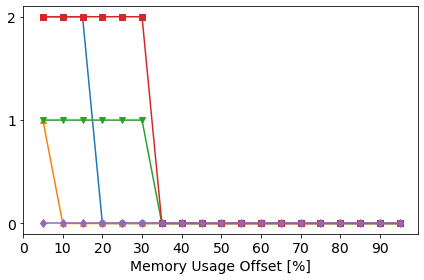

#memoryUsageTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	2	1	1	2	0
10	2	0	1	2	0
15	2	0	1	2	0
20	0	0	1	2	0
25	0	0	1	2	0
30	0	0	1	2	0
35	0	0	0	0	0
40	0	0	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [16]:
LOADS = [25, 75]
DURATIONS = [3, 6]
AP = 'WCS'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ].sort_values(by='memoryUsageTh')

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['memoryUsageTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Memory Usage Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIG:
        plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'memoryUsageTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

## BLOB

In [17]:
AP = 'BLOB'

MSG_TH = 5
CPU_TH = 10
HEAP_TH = 10

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numMsgs']==MSG_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['heapTh']==HEAP_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 5
25-6 = 5
25-12 = 6
50-3 = 5
50-6 = 5
50-12 = 5
75-3 = 5
75-6 = 5
75-12 = 5
100-3 = 5
100-6 = 5
100-12 = 5
### trainticket ###
25-3 = 1
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 1
100-6 = 1
100-12 = 1
### openmrs ###
25-3 = 2
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 1
75-3 = 3
75-6 = 3
75-12 = 1
100-3 = 3
100-6 = 1
100-12 = 1
### cloudstore ###
25-3 = 8
25-6 = 8
25-12 = 7
50-3 = 8
50-6 = 7
50-12 = 9
75-3 = 7
75-6 = 8
75-12 = 7
100-3 = 7
100-6 = 8
100-12 = 7
### teastore ###
25-3 = 6
25-6 = 6
25-12 = 6
50-3 = 6
50-6 = 6
50-12 = 6
75-3 = 5
75-6 = 6
75-12 = 5
100-3 = 6
100-6 = 5
100-12 = 5


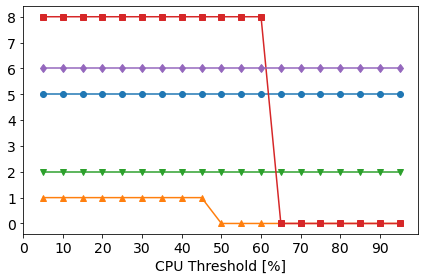

#cpuTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	5	1	2	8	6
10	5	1	2	8	6
15	5	1	2	8	6
20	5	1	2	8	6
25	5	1	2	8	6
30	5	1	2	8	6
35	5	1	2	8	6
40	5	1	2	8	6
45	5	1	2	8	6
50	5	0	2	8	6
55	5	0	2	8	6
60	5	0	2	8	6
65	5	0	2	0	6
70	5	0	2	0	6
75	5	0	2	0	6
80	5	0	2	0	6
85	5	0	2	0	6
90	5	0	2	0	6
95	5	0	2	0	6


In [18]:
LOAD = 25
DURATION = 3
AP = 'BLOB'

# Fixed parameters
HEAP_TH = 10
MSG_TH = 5

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['heapTh'] == HEAP_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ].sort_values(by='cpuTh')

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['cpuTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('CPU Threshold [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Heap) = ' + str(HEAP_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
# plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_heap' + str(HEAP_TH) + '_msg' + str(MSG_TH) + '.png')
plt.show()



X_AXIS = 'cpuTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

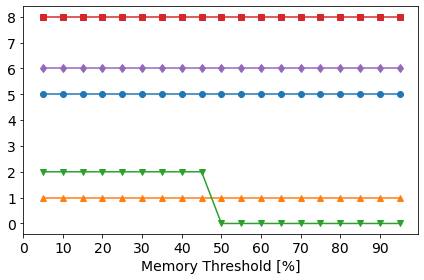

#heapTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	5	1	2	8	6
10	5	1	2	8	6
15	5	1	2	8	6
20	5	1	2	8	6
25	5	1	2	8	6
30	5	1	2	8	6
35	5	1	2	8	6
40	5	1	2	8	6
45	5	1	2	8	6
50	5	1	0	8	6
55	5	1	0	8	6
60	5	1	0	8	6
65	5	1	0	8	6
70	5	1	0	8	6
75	5	1	0	8	6
80	5	1	0	8	6
85	5	1	0	8	6
90	5	1	0	8	6
95	5	1	0	8	6


In [19]:
LOAD = 25
DURATION = 3
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
MSG_TH = 5

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ].sort_values(by='heapTh')

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['heapTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Memory Threshold [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
# plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_msg' + str(MSG_TH) + '.png')
plt.show()



X_AXIS = 'heapTh'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

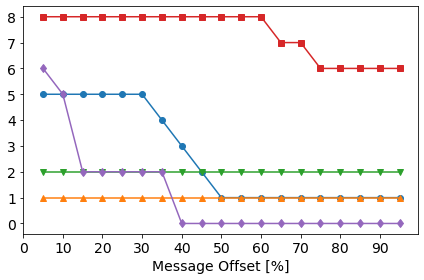

#numMsgs	webgoat	trainticket	openmrs	cloudstore	teastore
5	5	1	2	8	6
10	5	1	2	8	5
15	5	1	2	8	2
20	5	1	2	8	2
25	5	1	2	8	2
30	5	1	2	8	2
35	4	1	2	8	2
40	3	1	2	8	0
45	2	1	2	8	0
50	1	1	2	8	0
55	1	1	2	8	0
60	1	1	2	8	0
65	1	1	2	7	0
70	1	1	2	7	0
75	1	1	2	6	0
80	1	1	2	6	0
85	1	1	2	6	0
90	1	1	2	6	0
95	1	1	2	6	0


In [20]:
LOAD = 25
DURATION = 3
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
HEAP_TH = 10

dfTmp = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['heapTh'] == HEAP_TH)
          ].sort_values(by='numMsgs')

for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
    plt.plot(dfTmp[dfTmp['system']==sys]['numMsgs'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
plt.xticks(range(0,100,10), size=FONT_SIZE)
plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
plt.xlabel('Message Offset [%]', size=FONT_SIZE)
# plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Heap) = ' + str(HEAP_TH))
# plt.legend()
plt.tight_layout()
if SAVE_FIG:
    plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '_cpu' + str(CPU_TH) + '_heap' + str(HEAP_TH) + '.png')
plt.show()



X_AXIS = 'numMsgs'
HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
print(HEADER)
for th in range(5,96,5):
    string = str(th) + '\t'
    for sys in SYSTEMS:
        string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
        if sys != SYSTEMS[-1]:
            string += '\t'
    print(string)

## TOB

In [21]:
AP = 'TOB'

TIME_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 4
25-6 = 4
25-12 = 4
50-3 = 4
50-6 = 4
50-12 = 4
75-3 = 4
75-6 = 4
75-12 = 4
100-3 = 4
100-6 = 4
100-12 = 4
### trainticket ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### openmrs ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### cloudstore ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### teastore ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0


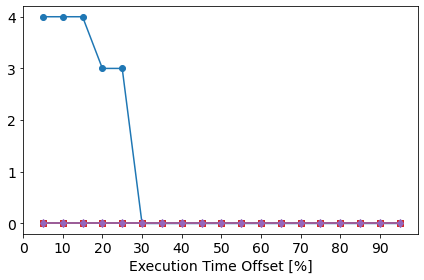

#methodTimeTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	4	0	0	0	0
10	4	0	0	0	0
15	4	0	0	0	0
20	3	0	0	0	0
25	3	0	0	0	0
30	0	0	0	0	0
35	0	0	0	0	0
40	0	0	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


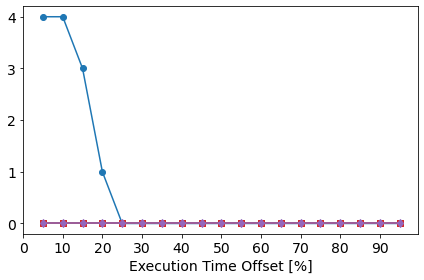

#methodTimeTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	4	0	0	0	0
10	4	0	0	0	0
15	3	0	0	0	0
20	1	0	0	0	0
25	0	0	0	0	0
30	0	0	0	0	0
35	0	0	0	0	0
40	0	0	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [22]:
LOADS = [25, 50]
DURATIONS = [3, 3]
AP = 'TOB'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ].sort_values(by='methodTimeTh')

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['methodTimeTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Execution Time Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIG:
        plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'methodTimeTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

## EST

In [23]:
AP = 'EST'

MSGS_TH = 5

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numMsgs']==MSGS_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 1
50-6 = 1
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 1
### trainticket ###
25-3 = 1
25-6 = 1
25-12 = 1
50-3 = 1
50-6 = 1
50-12 = 2
75-3 = 1
75-6 = 1
75-12 = 1
100-3 = 1
100-6 = 1
100-12 = 1
### openmrs ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### cloudstore ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### teastore ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 1
100-12 = 0


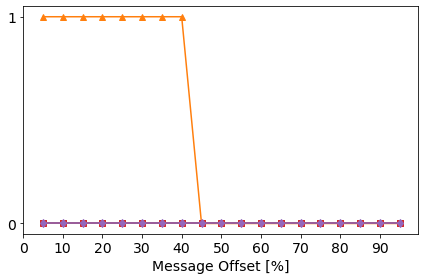

#numMsgs	webgoat	trainticket	openmrs	cloudstore	teastore
5	0	1	0	0	0
10	0	1	0	0	0
15	0	1	0	0	0
20	0	1	0	0	0
25	0	1	0	0	0
30	0	1	0	0	0
35	0	1	0	0	0
40	0	1	0	0	0
45	0	0	0	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


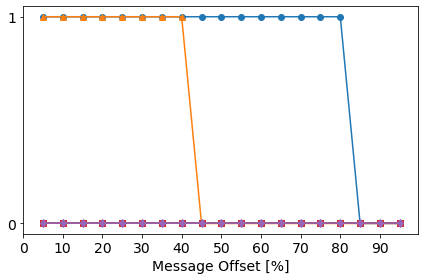

#numMsgs	webgoat	trainticket	openmrs	cloudstore	teastore
5	1	1	0	0	0
10	1	1	0	0	0
15	1	1	0	0	0
20	1	1	0	0	0
25	1	1	0	0	0
30	1	1	0	0	0
35	1	1	0	0	0
40	1	1	0	0	0
45	1	0	0	0	0
50	1	0	0	0	0
55	1	0	0	0	0
60	1	0	0	0	0
65	1	0	0	0	0
70	1	0	0	0	0
75	1	0	0	0	0
80	1	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [24]:
LOADS = [25, 100]
DURATIONS = [3, 12]
AP = 'EST'

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP)
              ].sort_values(by='numMsgs')

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['numMsgs'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Message Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIG:
        plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'numMsgs'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

## EDA

In [25]:
AP = 'EDA'

OBJS_TH = 5
HEAP_TH = 10

for SYSTEM in SYSTEMS:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmp = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numGCedObjsTh']==OBJS_TH) &
                       (dfOrig['heapTh']==HEAP_TH)
                      ]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmp['foundAP'].iloc[0]))

### webgoat ###
25-3 = 3
25-6 = 3
25-12 = 4
50-3 = 4
50-6 = 4
50-12 = 4
75-3 = 3
75-6 = 4
75-12 = 4
100-3 = 4
100-6 = 4
100-12 = 4
### trainticket ###
25-3 = 0
25-6 = 0
25-12 = 0
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 0
100-6 = 0
100-12 = 0
### openmrs ###
25-3 = 2
25-6 = 1
25-12 = 1
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 1
75-6 = 1
75-12 = 0
100-3 = 1
100-6 = 0
100-12 = 0
### cloudstore ###
25-3 = 0
25-6 = 2
25-12 = 2
50-3 = 0
50-6 = 0
50-12 = 0
75-3 = 0
75-6 = 0
75-12 = 0
100-3 = 2
100-6 = 2
100-12 = 2
### teastore ###
25-3 = 2
25-6 = 2
25-12 = 2
50-3 = 2
50-6 = 2
50-12 = 2
75-3 = 2
75-6 = 2
75-12 = 2
100-3 = 2
100-6 = 2
100-12 = 2


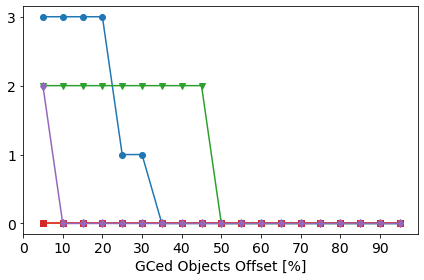

#numGCedObjsTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	3	0	2	0	2
10	3	0	2	0	0
15	3	0	2	0	0
20	3	0	2	0	0
25	1	0	2	0	0
30	1	0	2	0	0
35	0	0	2	0	0
40	0	0	2	0	0
45	0	0	2	0	0
50	0	0	0	0	0
55	0	0	0	0	0
60	0	0	0	0	0
65	0	0	0	0	0
70	0	0	0	0	0
75	0	0	0	0	0
80	0	0	0	0	0
85	0	0	0	0	0
90	0	0	0	0	0
95	0	0	0	0	0


In [26]:
LOADS = [25] 
DURATIONS = [3]
AP = 'EDA'

# Fixed parameters
HEAP_TH = 10

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP) &
               (dfOrig['heapTh']==HEAP_TH)
              ].sort_values(by='numGCedObjsTh')

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['numGCedObjsTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('GCed Objects Offset [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIG:
        plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'numGCedObjsTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

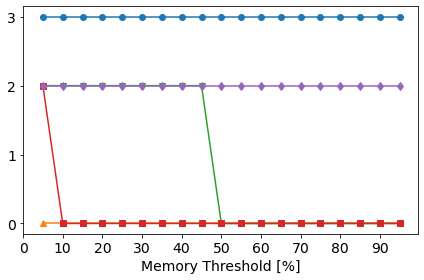

#heapTh	webgoat	trainticket	openmrs	cloudstore	teastore
5	3	0	2	2	2
10	3	0	2	0	2
15	3	0	2	0	2
20	3	0	2	0	2
25	3	0	2	0	2
30	3	0	2	0	2
35	3	0	2	0	2
40	3	0	2	0	2
45	3	0	2	0	2
50	3	0	0	0	2
55	3	0	0	0	2
60	3	0	0	0	2
65	3	0	0	0	2
70	3	0	0	0	2
75	3	0	0	0	2
80	3	0	0	0	2
85	3	0	0	0	2
90	3	0	0	0	2
95	3	0	0	0	2


In [27]:
LOADS = [25] 
DURATIONS = [3]
AP = 'EDA'

# Fixed parameters
GC_OBJS = 5

for LOAD, DURATION in zip(LOADS, DURATIONS):
    dfTmp = dfOrig[(dfOrig['load']==LOAD) &
               (dfOrig['duration']==DURATION) &
               (dfOrig['type']==AP) &
               (dfOrig['numGCedObjsTh']==GC_OBJS)
              ].sort_values(by='heapTh')

    for sys, stl, col in zip(SYSTEMS, STYLES, COLORS):
        plt.plot(dfTmp[dfTmp['system']==sys]['heapTh'], dfTmp[dfTmp['system']==sys]['foundAP'], stl, color=col, label=sys)
    plt.xticks(range(0,100,10), size=FONT_SIZE)
    plt.yticks(range(0,max(dfTmp['foundAP'])+1), size=FONT_SIZE)
    plt.xlabel('Memory Threshold [%]', size=FONT_SIZE)
    # plt.title(str(LOAD) + ' - ' + str(DURATION))
    # plt.legend()
    plt.tight_layout()
    if SAVE_FIG:
        plt.savefig(FOLDER_IMG + str(AP) + '_' + str(LOAD) + '-' + str(DURATION) + '.png')
    plt.show()
    
    
    
    X_AXIS = 'heapTh'
    HEADER = '#' + X_AXIS + '\t' + '\t'.join(SYSTEMS)
    print(HEADER)
    for th in range(5,96,5):
        string = str(th) + '\t'
        for sys in SYSTEMS:
            string += str(dfTmp[(dfTmp['system']==sys) & (dfTmp[X_AXIS]==th)]['foundAP'].iloc[0])
            if sys != SYSTEMS[-1]:
                string += '\t'
        print(string)

# Original vs. Refactored: OpenMRS

## CTH

In [28]:
AP = 'CTH'

COUNT_TH = 5
CPU_TH = 10
OPTION = 'average'

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['countTh']==COUNT_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['option']==OPTION)
                    ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['countTh']==COUNT_TH) &
                       (dfRef['cpuTh']==CPU_TH) &
                       (dfRef['option']==OPTION)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(-2)
25-6 = 0(0)
25-12 = 0(0)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(-1)
75-6 = 0(-1)
75-12 = 0(0)
100-3 = 1(1)
100-6 = 0(0)
100-12 = 0(0)


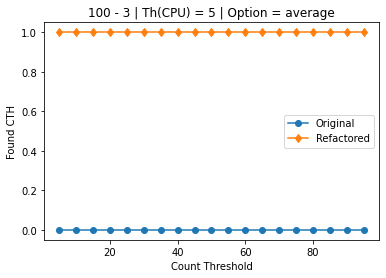

In [29]:
LOAD = 100
DURATION = 3
AP = 'CTH'
SYSTEM = 'openmrs'

# Fixed parameters
CPU_TH = 5
OPTION = 'average'

# X-axis parameter
X_PARAM = 'countTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['option'] == OPTION)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['option'] == OPTION)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Count Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Option = ' + OPTION)
plt.legend()
plt.show()

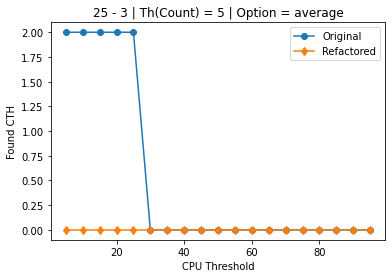

In [30]:
LOAD = 25
DURATION = 3
AP = 'CTH'
SYSTEM = 'openmrs'

# Fixed parameters
COUNT_TH = 5
OPTION = 'average'

# X-axis parameter
X_PARAM = 'cpuTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['countTh'] == COUNT_TH) &
           (dfOrig['option'] == OPTION)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['countTh'] == COUNT_TH) &
           (dfRef['option'] == OPTION)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('CPU Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Count) = ' + str(COUNT_TH) + ' | Option = ' + OPTION)
plt.legend()
plt.show()

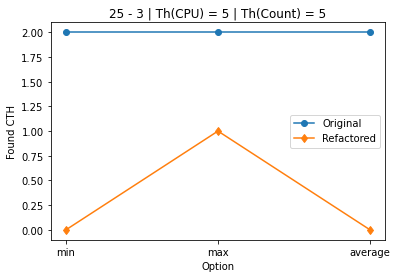

In [31]:
LOAD = 25
DURATION = 3
AP = 'CTH'
SYSTEM = 'openmrs'

# Fixed parameters
CPU_TH = 5
COUNT_TH = 5

# X-axis parameter
X_PARAM = 'option'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['countTh'] == COUNT_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['countTh'] == COUNT_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Option')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Count) = ' + str(COUNT_TH))
plt.legend()
plt.show()

## EP

In [32]:
AP = 'EP'

TIME_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['methodTimeTh']==TIME_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 2(-1)
25-6 = 1(1)
25-12 = 1(1)
50-3 = 1(0)
50-6 = 1(0)
50-12 = 1(0)
75-3 = 1(-1)
75-6 = 2(0)
75-12 = 1(0)
100-3 = 2(0)
100-6 = 1(0)
100-12 = 1(0)


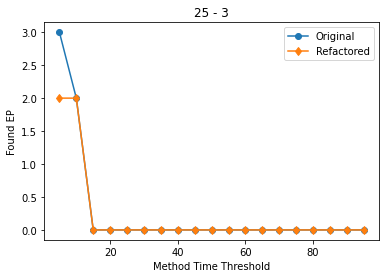

In [33]:
LOAD = 25
DURATION = 3
AP = 'EP'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'methodTimeTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Method Time Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

## WCS

In [34]:
AP = 'WCS'

MEM_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['memoryUsageTh']==MEM_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['memoryUsageTh']==MEM_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(-2)
25-6 = 0(0)
25-12 = 0(-1)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(-1)
75-6 = 0(-1)
75-12 = 0(0)
100-3 = 1(1)
100-6 = 0(0)
100-12 = 0(0)


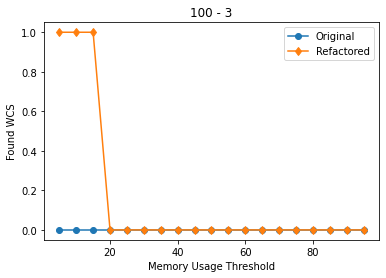

In [35]:
LOAD = 100
DURATION = 3
AP = 'WCS'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'memoryUsageTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Memory Usage Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

## BLOB

In [36]:
AP = 'BLOB'

MSG_TH = 5
CPU_TH = 10
HEAP_TH = 10

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numMsgs']==MSG_TH) &
                       (dfOrig['cpuTh']==CPU_TH) &
                       (dfOrig['heapTh']==HEAP_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['numMsgs']==MSG_TH) &
                       (dfRef['cpuTh']==CPU_TH) &
                       (dfRef['heapTh']==HEAP_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 3(1)
25-6 = 1(0)
25-12 = 1(0)
50-3 = 1(0)
50-6 = 1(0)
50-12 = 1(0)
75-3 = 1(-2)
75-6 = 3(0)
75-12 = 1(0)
100-3 = 2(-1)
100-6 = 1(0)
100-12 = 1(0)


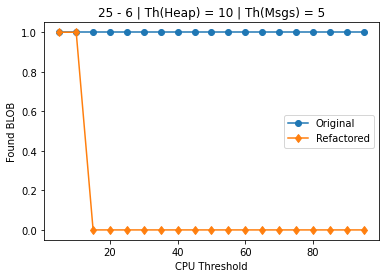

In [37]:
LOAD = 25
DURATION = 6
SYSTEM = 'openmrs'
AP = 'BLOB'

# Fixed parameters
HEAP_TH = 10
MSG_TH = 5

# X-axis parameter
X_PARAM = 'cpuTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['heapTh'] == HEAP_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['heapTh'] == HEAP_TH) &
           (dfRef['numMsgs'] == MSG_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('CPU Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(Heap) = ' + str(HEAP_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
plt.legend()
plt.show()

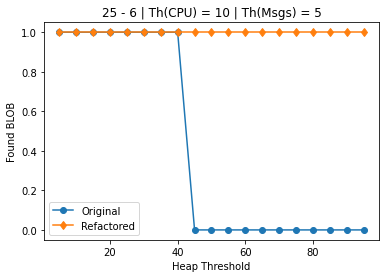

In [38]:
LOAD = 25
DURATION = 6
SYSTEM = 'openmrs'
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
MSG_TH = 5

# X-axis parameter
X_PARAM = 'heapTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['numMsgs'] == MSG_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['numMsgs'] == MSG_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Heap Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Msgs) = ' + str(MSG_TH))
plt.legend()
plt.show()

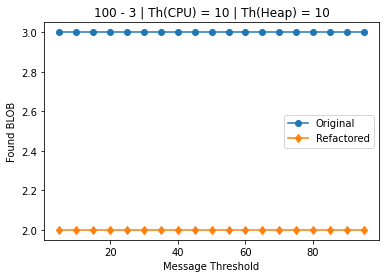

In [39]:
LOAD = 100
DURATION = 3
SYSTEM = 'openmrs'
AP = 'BLOB'

# Fixed parameters
CPU_TH = 10
HEAP_TH = 10

# X-axis parameter
X_PARAM = 'numMsgs'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['cpuTh'] == CPU_TH) &
           (dfOrig['heapTh'] == HEAP_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['cpuTh'] == CPU_TH) &
           (dfRef['heapTh'] == HEAP_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Message Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION) + ' | Th(CPU) = ' + str(CPU_TH) + ' | Th(Heap) = ' + str(HEAP_TH))
plt.legend()
plt.show()

## TOB

In [40]:
AP = 'TOB'

TIME_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['methodTimeTh']==TIME_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['methodTimeTh']==TIME_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(0)
25-6 = 0(0)
25-12 = 0(0)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(0)
75-6 = 0(0)
75-12 = 0(0)
100-3 = 0(0)
100-6 = 0(0)
100-12 = 0(0)


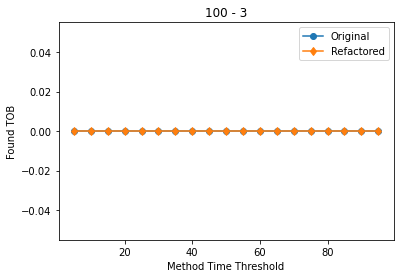

In [41]:
LOAD = 100
DURATION = 3
AP = 'TOB'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'methodTimeTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Method Time Threshold')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

## EST

In [42]:
AP = 'EST'

MSGS_TH = 5

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numMsgs']==MSGS_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['numMsgs']==MSGS_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 0(0)
25-6 = 0(0)
25-12 = 0(0)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(0)
75-6 = 0(0)
75-12 = 0(0)
100-3 = 0(0)
100-6 = 0(0)
100-12 = 0(0)


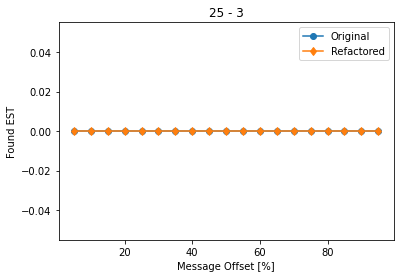

In [43]:
LOAD = 25
DURATION = 3
AP = 'EST'
SYSTEM = 'openmrs'

# X-axis parameter
X_PARAM = 'numMsgs'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Message Offset [%]')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

## EDA

In [44]:
AP = 'EDA'

GCED_TH = 5
HEAP_TH = 10

for SYSTEM in ['openmrs']:
    print('### ' + SYSTEM + ' ###')
    for LOAD in [25, 50, 75, 100]:
        for DURATION in [3, 6, 12]:
            dfTmpO = dfOrig[(dfOrig['load']==LOAD) &
                       (dfOrig['duration']==DURATION) &
                       (dfOrig['type']==AP) &
                       (dfOrig['system']==SYSTEM) &
                       (dfOrig['numGCedObjsTh']==GCED_TH) &
                       (dfOrig['heapTh'] == HEAP_TH)
                      ]
            dfTmpR = dfRef[(dfRef['load']==LOAD) &
                       (dfRef['duration']==DURATION) &
                       (dfRef['type']==AP) &
                       (dfRef['system']==SYSTEM) &
                       (dfRef['numGCedObjsTh']==GCED_TH) &
                       (dfRef['heapTh'] == HEAP_TH)
                      ]
            diff = dfTmpR['foundAP'].iloc[0] - dfTmpO['foundAP'].iloc[0]
            print(str(LOAD) + '-' + str(DURATION) + ' = ' + str(dfTmpR['foundAP'].iloc[0]) + '(' + str(diff) + ')')

### openmrs ###
25-3 = 1(-1)
25-6 = 0(-1)
25-12 = 1(0)
50-3 = 0(0)
50-6 = 0(0)
50-12 = 0(0)
75-3 = 0(-1)
75-6 = 1(0)
75-12 = 0(0)
100-3 = 1(0)
100-6 = 0(0)
100-12 = 0(0)


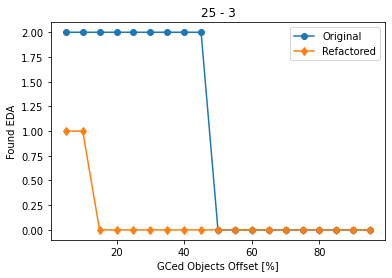

In [45]:
LOAD = 25
DURATION = 3
AP = 'EDA'
SYSTEM = 'openmrs'

# Fixed parameters
HEAP_TH = 10

# X-axis parameter
X_PARAM = 'numGCedObjsTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['heapTh'] == HEAP_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['heapTh'] == HEAP_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('GCed Objects Offset [%]')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()

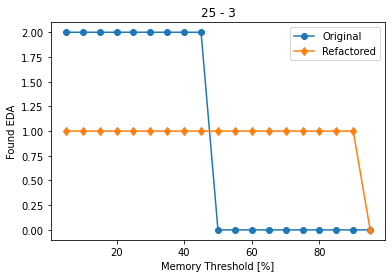

In [46]:
LOAD = 25
DURATION = 3
AP = 'EDA'
SYSTEM = 'openmrs'

# Fixed parameters
GCED_TH = 5

# X-axis parameter
X_PARAM = 'heapTh'

dfTmpOrig = dfOrig[(dfOrig['load']==LOAD) &
           (dfOrig['duration']==DURATION) &
           (dfOrig['system']==SYSTEM) &
           (dfOrig['type']==AP) &
           (dfOrig['numGCedObjsTh'] == GCED_TH)
          ]

dfTmpRef = dfRef[(dfRef['load']==LOAD) &
           (dfRef['duration']==DURATION) &
           (dfRef['system']==SYSTEM) &
           (dfRef['type']==AP) &
           (dfRef['numGCedObjsTh'] == GCED_TH)
          ]

plt.plot(dfTmpOrig[X_PARAM], dfTmpOrig['foundAP'], '-o', label='Original')
plt.plot(dfTmpRef[X_PARAM], dfTmpRef['foundAP'], '-d', label='Refactored')
plt.xlabel('Memory Threshold [%]')
plt.ylabel('Found ' + AP)
plt.title(str(LOAD) + ' - ' + str(DURATION))
plt.legend()
plt.show()